In [2]:
import tweepy
import pandas as pd
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import nltk 
from PIL import Image

In [11]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/zx/2rf9szm12ds78swf8zq0f6940000gn/T/pip-req-build-9fu3v1a3
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/zx/2rf9szm12ds78swf8zq0f6940000gn/T/pip-req-build-9fu3v1a3
  Created wheel for snscrape: filename=snscrape-0.4.3.20220107.dev66+ge09aea7-py3-none-any.whl size=67994 sha256=71f0bcb76408225b1679ba2332a8e45db7e4eb6d92db9d2270e4f4a60fde9881
  Stored in directory: /private/var/folders/zx/2rf9szm12ds78swf8zq0f6940000gn/T/pip-ephem-wheel-cache-f4lkrrrd/wheels/92/42/87/33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built snscrape
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.4.3.20220106
    Uninstalling snscrape-0.4.3.20220106:
      Successfully uninstalled snscrape-0.4.3.20220106
Note: you may need to restart the kernel to use updated packages.


In [75]:
# Created a list to append all tweet attributes(data)
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Wuhan lang:en since:2021-12-01 until:2022-01-01').get_items()):
    if i>5000:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

<ipython-input-75-215390710c68>:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


In [76]:
tweets_df.to_csv(r'2021.12.01.csv', index=False)

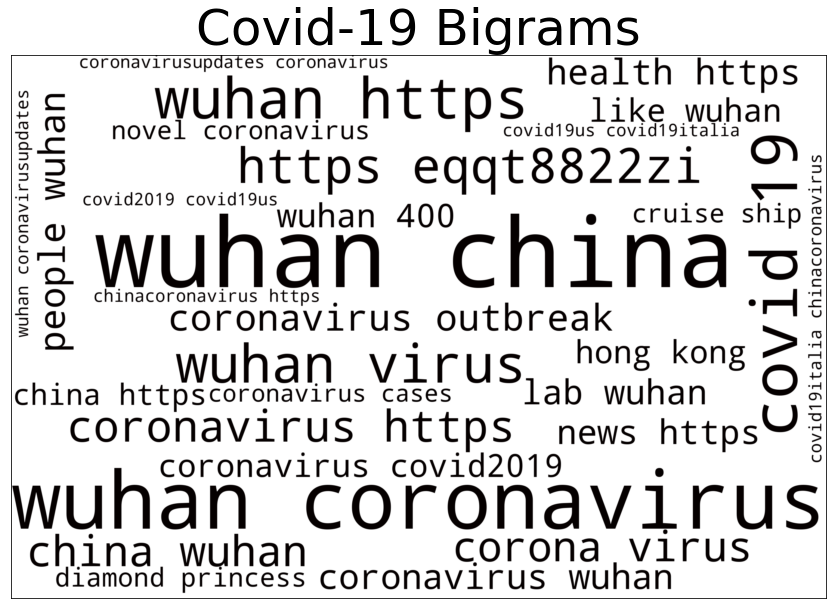

In [31]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2), max_df = .9, min_df = .01)

X = vectorizer.fit_transform(tweets_df['Tweets'])
feature_names = vectorizer.get_feature_names()

dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

df_avg = df.mean(axis=0)

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(df_avg)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.xticks([])
plt.yticks([])
plt.title('Covid-19 Bigrams', fontdict={'fontsize': 50})
# save the image
plt.savefig('Covid-19_bigrams.png')
#%%

#image = Image.open('Covid-19.png')
##image.show()
#image = Image.open('Covid19.png')
##image.show()
#image = Image.open('Coronavirus.png')
#image.show()
#image = Image.open('Covid-19_stopwords.png')
#image.show()
#image = Image.open('Covid-19_stemmed.png')
#image.show()
image = Image.open('Covid-19_bigrams.png')
image.show()